<a href="https://colab.research.google.com/github/bgoueti/Data-Science-BloomTech/blob/main/LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BloomTech Data Science

*Unit 2, Sprint 1, Module 2*

---

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [1]:
# Libraries for model building
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Libraries for

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
            (df['price'] <= np.percentile(df['price'], 99.5)) &
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    # Task 1: Parse 'created' column as a DateTime object and set as the index of the DataFrame.
    df['created'] = pd.to_datetime(df['created'])
    df.set_index('created', inplace = True)
    df.dropna(inplace = True)


    # Task 2: Feature engineering
    df['apartment_description'] = df['description'].notna().astype(int)

    df['total_beds_and_baths_rooms'] = df['bathrooms'] + df['bedrooms']

    return df


filepath = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame.
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features.

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [3]:
# Conduct your exploratory data analysis here,
# and then modify the function above.


In [4]:
df = wrangle(filepath)

df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,...,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,apartment_description,total_beds_and_baths_rooms
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,...,0,0,0,0,0,0,0,0,1,4.5
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,...,0,0,0,0,0,0,0,0,1,3.0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,...,0,0,0,0,0,0,0,0,1,2.0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,...,0,0,0,0,0,0,0,0,1,2.0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,...,0,0,0,0,0,0,0,0,1,5.0


In [5]:
df.shape

(47260, 35)

In [6]:
df.isnull().sum()

bathrooms                     0
bedrooms                      0
description                   0
display_address               0
latitude                      0
longitude                     0
price                         0
street_address                0
interest_level                0
elevator                      0
cats_allowed                  0
hardwood_floors               0
dogs_allowed                  0
doorman                       0
dishwasher                    0
no_fee                        0
laundry_in_building           0
fitness_center                0
pre-war                       0
laundry_in_unit               0
roof_deck                     0
outdoor_space                 0
dining_room                   0
high_speed_internet           0
balcony                       0
swimming_pool                 0
new_construction              0
terrace                       0
exclusive                     0
loft                          0
garden_patio                  0
wheelcha

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [7]:
X = df.drop(columns = ['price', 'description', 'display_address', 'street_address', 'interest_level'])

y = df['price']


In [8]:
X.shape, y.shape

((47260, 30), (47260,))

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016.
- Your test set should include data from June 2016.

In [9]:
X_train, y_train = X.loc['2016-04':'2016-05'], y.loc['2016-04':'2016-05']
X_test, y_test = X.loc['2016-06'], y.loc['2016-06']

<ipython-input-9-88c8d6605671>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X_train, y_train = X.loc['2016-04':'2016-05'], y.loc['2016-04':'2016-05']


# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [10]:
y_pred_baseline = [y_train.mean()] * len(y_train)

In [11]:
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1202.398300781848


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [12]:
# Step 1: Import predictor class


# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)


LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [13]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.6760791871723
Test MAE: 701.2714718373542


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [14]:
training_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6163373587860099
Test MAE: 0.6263721718538795


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [16]:
coef_abs = np.abs(model.coef_)
top_three_indices = np.argsort(coef_abs)[::-1][:1]
top_three_features = X_train.columns[top_three_indices]
print('Top Three Features:', top_three_features)

Top Three Features: Index(['total_beds_and_baths_rooms'], dtype='object')


Text(0, 0.5, 'Price')

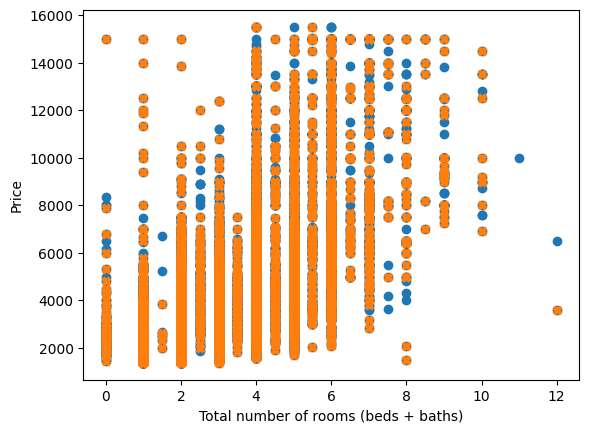

In [22]:
# Plotting the data

plt.scatter(X['total_beds_and_baths_rooms'], y)
plt.scatter(X_train['total_beds_and_baths_rooms'], y_train, marker = 'X')
plt.xlabel('Total number of rooms (beds + baths)')
plt.ylabel('Price')
